# Support Vector Machines

In [37]:
import numpy as np                    
import matplotlib.pyplot as plt        
import sklearn                         
import sklearn.datasets as ds           
import sklearn.model_selection as cv   
import sklearn.neighbors as nb          
from sklearn.model_selection import cross_val_score  
%matplotlib inline        

In [38]:
import numpy as np    # Numeric and matrix computation
import pandas as pd   # Optional: good package for manipulating data 
import sklearn as sk  # Package with learning algorithms implemented

# Loading the dataset.
dfTrain = pd.read_csv(r'..\Datasets\training-dataset-reduced.csv')
dfTest = pd.read_csv(r'..\Datasets\testing-dataset-reduced.csv')

dfTrain = dfTrain.iloc[: , 1:]
dfTest = dfTest.iloc[: , 1:]
X_train, y_train = dfTrain.drop('y', axis=1), dfTrain["y"]
X_test, y_test = dfTest.drop('y', axis=1), dfTest["y"]


## Linear SVM

Let's try an SVM with default parameters. Linear means that we are not using any kernel to move the data to a higher dimensional space.

Confusion matrix:


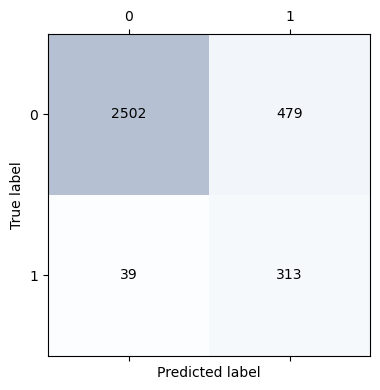

              precision    recall  f1-score   support

         0.0       0.98      0.84      0.91      2981
         1.0       0.40      0.89      0.55       352

    accuracy                           0.84      3333
   macro avg       0.69      0.86      0.73      3333
weighted avg       0.92      0.84      0.87      3333


Number of supports:  2561 ( 2518 of them have slacks)
Prop. of supports:  0.38413079346032697


In [39]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

knc = SVC(kernel='linear')
knc.fit(X_train, y_train)
pred=knc.predict(X_test)

#print the confusion matrix
confmat = sklearn.metrics.confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=10)
print("Confusion matrix:")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

print(sklearn.metrics.classification_report(y_test, pred))
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==1.0) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])



These results could be considered bad results, as weak classifiers do better than this. A way to improve the model is by configuring the parametes. 
The linear SVM has parameter C that has to be adjusted. We will use *GridSearch* method to find the optimal value of C.

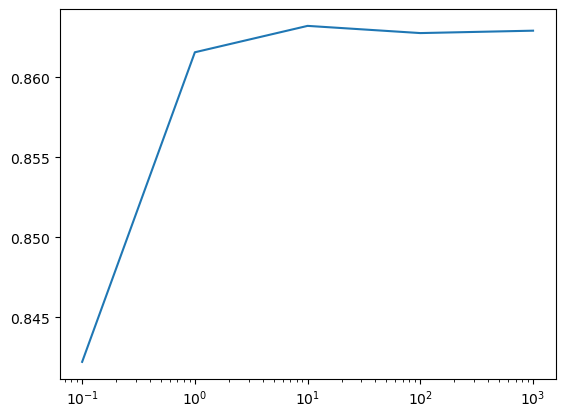

In [40]:
# List of C values to test.
Cs = np.logspace(-1, 3, num=5, base=10.0)
param_grid = {'C': Cs}
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=4, n_jobs=4)
grid_search.fit(X_train,y_train)

# Let's plot the 4-fold cross.validation accuracy deppending on C
scores = grid_search.cv_results_['mean_test_score']
plt.semilogx(Cs,scores)
plt.show()


Accuracy 4-fold cross on train data=  0.8632063803325769
Confusion matrix:


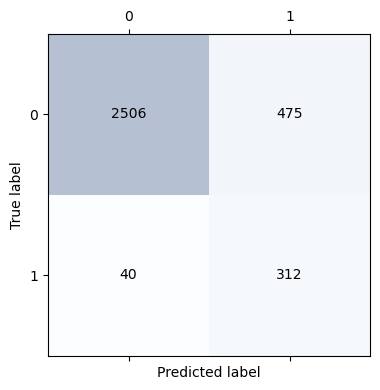

              precision    recall  f1-score   support

         0.0       0.98      0.84      0.91      2981
         1.0       0.40      0.89      0.55       352

    accuracy                           0.85      3333
   macro avg       0.69      0.86      0.73      3333
weighted avg       0.92      0.85      0.87      3333


Best combination of parameters found:  {'C': 10.0}

Number of supports:  2357 ( 2315 of them have slacks)
Prop. of supports:  0.3535323233838308


In [41]:

parval=grid_search.best_params_
cvacc = cross_val_score(SVC(C=parval['C'],kernel='linear'), X=X_train,  y=y_train, cv=4, scoring='accuracy')
print('Accuracy 4-fold cross on train data= ', cvacc.mean())


# Let's apply the best C parameter found to the test set

knc = SVC(C=parval['C'],kernel='linear')
knc.fit(X_train, y_train)
pred=knc.predict(X_test)

#print the confusion matrix
confmat = sklearn.metrics.confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=10)
print("Confusion matrix:")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

print(sklearn.metrics.classification_report(y_test, pred))

print("\nBest combination of parameters found: ",parval)
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])


This are still very bad results and the improvment is practically null. Because lineal kernel give that bad results, we can conclude that our problem is not linear. Let's try with polynomial kernel.

## Polynomial kernels


Confusion matrix:


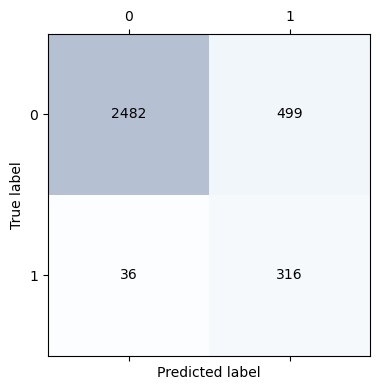

              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90      2981
         1.0       0.39      0.90      0.54       352

    accuracy                           0.84      3333
   macro avg       0.69      0.87      0.72      3333
weighted avg       0.92      0.84      0.86      3333


Number of supports:  2873 ( 2679 of them have slacks)
Prop. of supports:  0.4309284535773211


In [42]:
knc = SVC(kernel='poly',degree =2) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)

#print the confusion matrix
confmat = sklearn.metrics.confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=10)
print("Confusion matrix:")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

print(sklearn.metrics.classification_report(y_test, pred))
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==1.0) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])



Worse performance than the obtained with a linear SVM... It could improve if we tune the C parameter for the polynomial kernel. Let's do that now.

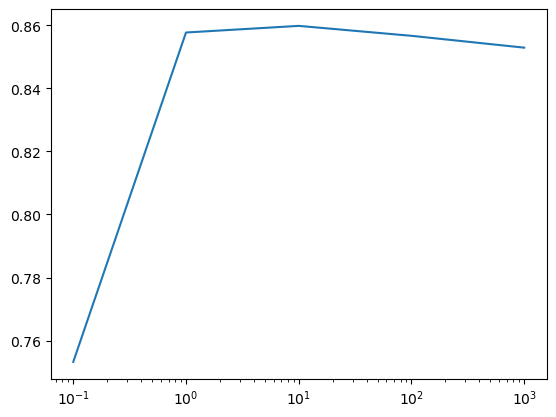

Acc. 4-fold cross on train data=  0.8597578803567018
Confusion matrix:


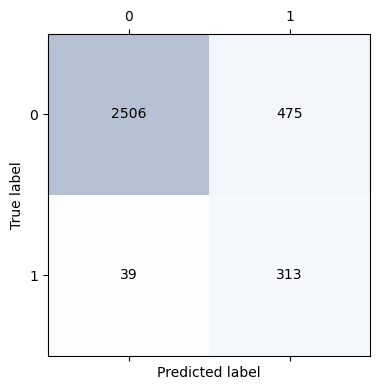

              precision    recall  f1-score   support

         0.0       0.98      0.84      0.91      2981
         1.0       0.40      0.89      0.55       352

    accuracy                           0.85      3333
   macro avg       0.69      0.86      0.73      3333
weighted avg       0.92      0.85      0.87      3333


Best combination of parameters found:  {'C': 10.0}

Number of supports:  2297 ( 1954 of them have slacks)
Prop. of supports:  0.3445327733613319


In [43]:
Cs = np.logspace(-1, 3, num=5, base=10.0)

param_grid = {'C': Cs}
grid_search = GridSearchCV(SVC(kernel='poly',degree =2) , param_grid, cv=4, n_jobs=4)
grid_search.fit(X_train,y_train)

scores = grid_search.cv_results_['mean_test_score']

plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_

cvacc = cross_val_score(SVC(kernel='poly',degree =2,C=parval['C']) , X=X_train,  y=y_train, cv=4, scoring='accuracy')
print('Acc. 4-fold cross on train data= ', cvacc.mean())


knc = SVC(kernel='poly',degree =2,C=parval['C']) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
#print the confusion matrix
confmat = sklearn.metrics.confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=10)
print("Confusion matrix:")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

print(sklearn.metrics.classification_report(y_test, pred))
print("\nBest combination of parameters found: ",parval)
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

Once again, results are worse than the linear kernel and, in fact, as the best C value found is 1, the results are not improved.

Confusion matrix:


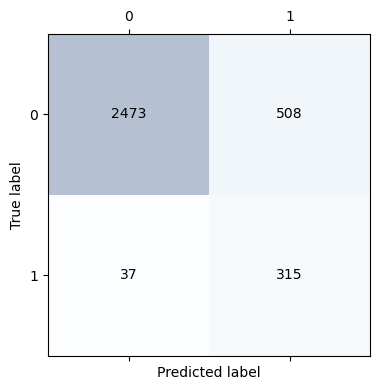

              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90      2981
         1.0       0.38      0.89      0.54       352

    accuracy                           0.84      3333
   macro avg       0.68      0.86      0.72      3333
weighted avg       0.92      0.84      0.86      3333


Number of supports:  2859 ( 2448 of them have slacks)
Prop. of supports:  0.4288285585720714


In [44]:
knc = SVC(kernel='poly',degree =3) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)

#print the confusion matrix
confmat = sklearn.metrics.confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=10)
print("Confusion matrix:")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

print(sklearn.metrics.classification_report(y_test, pred))
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==1.0) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])


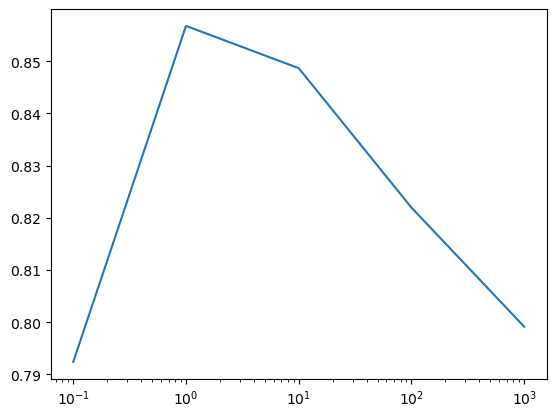

Acc. 4-fold cross on train data=  0.8567569499305421
Confusion matrix:


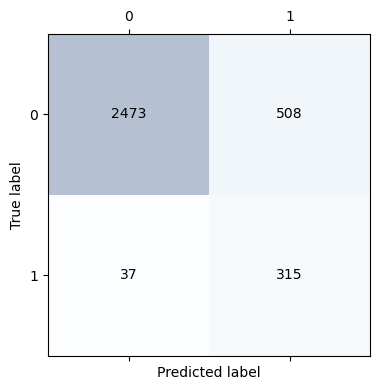

              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90      2981
         1.0       0.38      0.89      0.54       352

    accuracy                           0.84      3333
   macro avg       0.68      0.86      0.72      3333
weighted avg       0.92      0.84      0.86      3333


Best combination of parameters found:  {'C': 1.0}

Number of supports:  2859 ( 2448 of them have slacks)
Prop. of supports:  0.4288285585720714


In [45]:
Cs = np.logspace(-1, 3, num=5, base=10.0)

param_grid = {'C': Cs}
grid_search = GridSearchCV(SVC(kernel='poly',degree =3) , param_grid, cv=4, n_jobs=4)
grid_search.fit(X_train,y_train)

scores = grid_search.cv_results_['mean_test_score']

plt.semilogx(Cs,scores)
plt.show()

parval=grid_search.best_params_

cvacc = cross_val_score(SVC(kernel='poly',degree =3,C=parval['C']) , X=X_train,  y=y_train, cv=4, scoring='accuracy')
print('Acc. 4-fold cross on train data= ', cvacc.mean())

knc = SVC(kernel='poly',degree =3,C=parval['C']) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)

#print the confusion matrix
confmat = sklearn.metrics.confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=10)
print("Confusion matrix:")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

print(sklearn.metrics.classification_report(y_test, pred))
print("\nBest combination of parameters found: ",parval)
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])

## RBF Kernel

There's another possibility for the kernel: The RBF kernel. This is the default kernel in the implementation of SVMs in sklearn, so we don't need to explicitely say the kernel used. Let's try it with default parameters.

Confusion matrix:


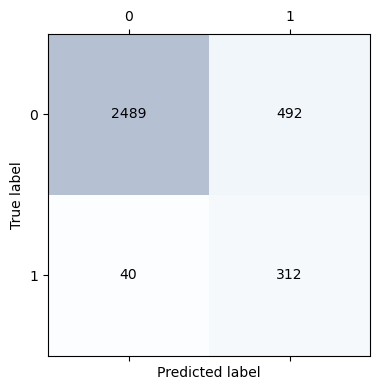

              precision    recall  f1-score   support

         0.0       0.98      0.83      0.90      2981
         1.0       0.39      0.89      0.54       352

    accuracy                           0.84      3333
   macro avg       0.69      0.86      0.72      3333
weighted avg       0.92      0.84      0.87      3333


Number of supports:  3291 ( 2958 of them have slacks)
Prop. of supports:  0.4936253187340633


In [46]:
knc = SVC() 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)

#print the confusion matrix
confmat = sklearn.metrics.confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=10)
print("Confusion matrix:")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

print(sklearn.metrics.classification_report(y_test, pred))
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==1.0) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])


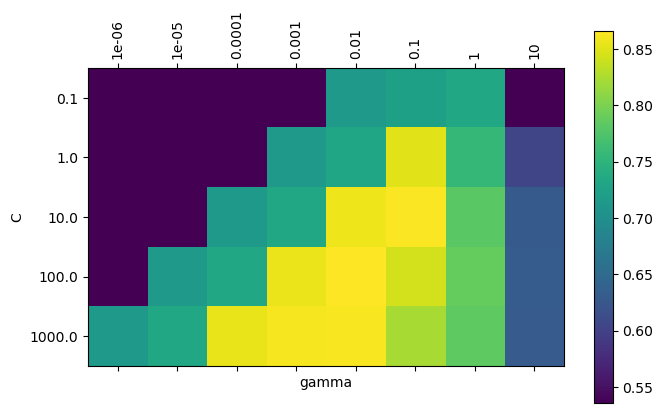


Best combination of parameters found:  {'C': 100.0, 'gamma': 0.01}

Acc. 4-fold cross on train data=  0.8660566206086514


In [47]:

# Values we will test for each parameter. When observin results, consider the limits of the 
# values tested and increase them if necessary 
gammas = [0.000001,0.00001, 0.0001,0.001,0.01,0.1,1,10]
Cs = np.logspace(-1, 3, num=5, base=10.0)

param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(), param_grid, cv=4, n_jobs=4)
grid_search.fit(X_train,y_train)
parval=grid_search.best_params_

# We'll show in a grid, the accuracy for each combination of parameters tester
scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(param_grid['C']), len(param_grid['gamma']))

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'],rotation='vertical')
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.show()
parval=grid_search.best_params_
print("\nBest combination of parameters found: ",parval)


cvacc = cross_val_score(SVC(C=parval['C'], gamma=parval['gamma']) , X=X_train,  y=y_train, cv=4, scoring='accuracy')
print('\nAcc. 4-fold cross on train data= ', cvacc.mean())


Confusion matrix:


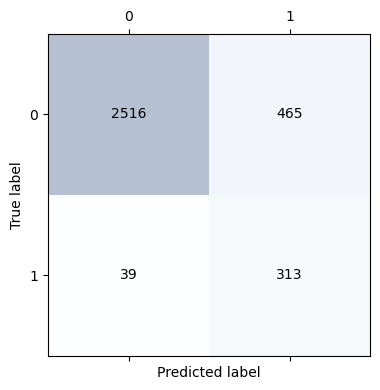

              precision    recall  f1-score   support

         0.0       0.98      0.84      0.91      2981
         1.0       0.40      0.89      0.55       352

    accuracy                           0.85      3333
   macro avg       0.69      0.87      0.73      3333
weighted avg       0.92      0.85      0.87      3333


Number of supports:  2430 ( 2272 of them have slacks)
Prop. of supports:  0.36448177591120445


In [48]:
# Let's apply the best combination of parameters found to the test set

knc = SVC(C=parval['C'], gamma=parval['gamma']) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)

#print the confusion matrix
confmat = sklearn.metrics.confusion_matrix(y_test, pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=10)
print("Confusion matrix:")
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

print(sklearn.metrics.classification_report(y_test, pred))
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])